# Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, auc,roc_curve,roc_auc_score


In [2]:
# Avoid OOM errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

# Looking Data

In [3]:
# to check out what we hvae in our Data folder
os.listdir('Data')

['.DS_Store',
 'VeryMildDemented',
 'ModerateDemented',
 'MildDemented',
 'NonDemented']

In [4]:
data_dir = 'Data'

In [5]:
# this allows us to loop through the Data 
# directory VeryMildDemented folder for the images
len(os.listdir(os.path.join(data_dir, 'VeryMildDemented')))

8960

(190, 200, 3)


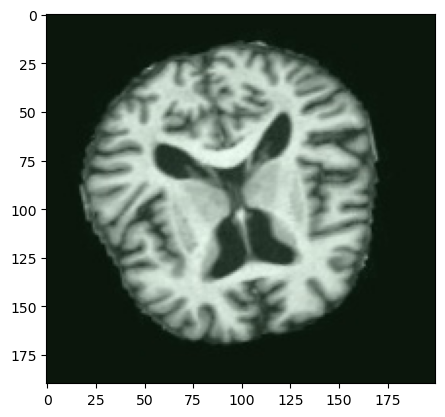

In [6]:
# loading and testing out data 
img = cv2.imread(os.path.join('Data','VeryMildDemented','2b70a7c4-b97a-4887-8e5f-85c079e7b275.jpg'))
print(img.shape)
plt.imshow(img);
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
# if you have color problem use this 

# Load Data

In [7]:
# Set up the paths and class labels
data_dir = 'Data'
class_labels = ['VeryMildDemented', 'ModerateDemented', 'MildDemented', 'NonDemented']
image_size = (224, 224) # Desired image size

In [8]:
# Load the images and labels:
img = []
lbl = []

for label_idx, label in enumerate(class_labels):
    folder_path = os.path.join(data_dir, label)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = cv2.resize(image, image_size)  # Resize the image
        img.append(image)
        lbl.append(label_idx)

In [9]:
# Convert the images and labels to numpy arrays:
images = np.array(img)
labels = np.array(lbl)

# Train, Test, Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [11]:
x_train = X_train/255 # normalization
x_test = X_test/255

In [12]:
# Keras requires multi-class labels to be one-hot encoded
y_tr_one_hot = to_categorical(y_train)
y_tt_one_hot = to_categorical(y_test)
y_tt_one_hot

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [13]:
x_train.shape

(27187, 224, 224, 3)